![GMV](https://www.gmv.com/export/system/modules/com.gmv.teresa.site/resources/theme/img/logo_gmv.svg) ![Apache Spark](http://spark.apache.org/images/spark-logo.png)

# Intrusion Detection System

Abstract 
--------

Security and privacy of a system is compromised, when an intrusion happens. Intrusion Detection System (IDS) plays vital role in network security as it detects various types of attacks in network. So here, we are going to propose Intrusion Detection System using machine learning algorithms. The proposed system will be done by conducting some experiments using [NSL-KDD Cup’99](http://nsl.cs.unb.ca/NSL-KDD/) dataset which is improved version of [KDD Cup’99 data set](http://archive.ics.uci.edu/ml/datasets/KDD+Cup+1999+Data).

Data Mining Process
------------------- 
The [Cross Industry Standard Process for Data Mining](https://en.wikipedia.org/wiki/Cross_Industry_Standard_Process_for_Data_Mining) introduced a process model for data mining in 2000 that has become widely adopted.

<a href="https://en.wikipedia.org/wiki/Cross_Industry_Standard_Process_for_Data_Mining"> 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/479px-CRISP-DM_Process_Diagram.png" title="Cross Industry Standard Process for Data Mining" alt="CRISP-DM_Process_Diagram"/></a>



The model emphasizes the ***iterative*** nature of the data mining process, distinguishing several different stages that are regularly revisited in the course of developing and deploying data-driven solutions to business problems
* Business understanding
* Data understanding
* Data preparation
* Modeling
* Deployment

# Business Understanding

Nowadays the cyber security threats are rising and putting in risk a great number of organizations. Any organization could be a target for the attackers that produce huge damages into it.

For these reasons it's necessary to provide a system that help to detect intruders in a network. This intrusion detection system should be non-invasive to other systems to provide a quick deployment and to get results a soon as possible. 

It's also important to balance the number of false positives (that increase the maintenance of the system) with the number of false negatives (that would allow to intruders achieve their objectives)

# Data Understanding

**KDD Cup'99 data set** used for The Third International Knowledge Discovery and Data Mining Tools Competition, which was held in conjunction with KDD-99 The Fifth International Conference on Knowledge Discovery and Data Mining. The competition task was to build a network intrusion detector, a predictive model capable of distinguishing between **``bad'' connections**, called intrusions or attacks, and **``good'' normal connections**. This database contains a standard set of data to be audited, which includes a wide variety of intrusions simulated in a military network environment.

**NSL-KDD** is a data set suggested to solve some of the inherent problems of the KDD'99 data set. Although, this new version of the KDD data set still suffers from some of the problems and may not be a perfect representative of existing real networks, because of the lack of public data sets for network-based IDSs, we believe it still can be applied as an effective benchmark data set to help researchers compare different intrusion detection methods. Furthermore, the number of records in the NSL-KDD train and test sets are reasonable. This advantage makes it affordable to run the experiments on the complete set without the need to randomly select a small portion. Consequently, evaluation results of different research work will be consistent and comparable

A connection is a sequence of TCP packets starting and ending at some well defined times, between which data flows to and from a source IP address to a target IP address under some well defined protocol.  Each connection is labeled as either normal, or as an attack, with exactly one specific attack type.  Each connection record consists of about 100 bytes.

Attacks fall into four main categories:

* DOS: denial-of-service, e.g. syn flood;
* R2L: unauthorized access from a remote machine, e.g. guessing password;
* U2R:  unauthorized access to local superuser (root) privileges, e.g., various ``buffer overflow'' attacks;
* probing: surveillance and other probing, e.g., port scanning.

It is important to note that the test data is not from the same probability distribution as the training data, and it includes specific attack types not in the training data.  This makes the task more realistic.  Some intrusion experts believe that most novel attacks are variants of known attacks and the "signature" of known attacks can be sufficient to catch novel variants.  The datasets contain a total of 24 training attack types, with an additional 14 types in the test data only. 

### Derived Features ###

Higher-level features had been defined that help in distinguishing *normal* connections from *attacks*.  There are several categories of derived features.

**Intrinsic attributes**

These attributes are extracted from the headers' area of the network packets.

Col|Feature name  | description |	type
---|--------------|-------------|------------
1  |duration 	  |length (number of seconds) of the connection |continuous
2  |protocol_type |type of the protocol, e.g. tcp, udp, etc. |discrete
3  |service 	  |network service on the destination, e.g., http, telnet, etc. |discrete
4  |flag 	      |normal or error status of the connection. The possible status are this: SF, S0, S1, S2, S3, OTH, REJ, RSTO, RSTOS0, SH, RSTRH, SHR 	|discrete 
5  |src_bytes 	  |number of data bytes from source to destination 	|continuous
6  |dst_bytes 	  |number of data bytes from destination to source 	|continuous
7  |land 	      |1 if connection is from/to the same host/port; 0 otherwise 	|discrete
8  |wrong_fragment|sum of bad checksum packets in a connection 	|continuous
9  |urgent 	      |number of urgent packets. Urgent packets are packets with the urgent bit activated 	|continuous



**Content attributes** 

These attributes are extracted from the contents area of the network packets based on expert person knowledge.

Col|Feature name	      |description 	|type
---|----------------------|-------------|-----
10 |hot 	              |sum of hot actions in a connection such as: entering a system direc- tory, creating programs and executing programs	|continuous
11 |num_failed_logins 	  |number of failed login attempts 	|continuous
12 |logged_in 	          |1 if successfully logged in; 0 otherwise 	|discrete
13 |num_compromised 	  |number of "compromised" conditions 	|continuous
14 |root_shell 	          |1 if root shell is obtained; 0 otherwise 	|discrete
15 |su_attempted 	      |1 if "su root" command attempted; 0 otherwise 	|discrete
16 |num_root 	          |number of "root'" accesses 	|continuous
17 |num_file_creations 	  |number of file creation operations 	|continuous
18 |num_shells 	          |number of shell prompts 	|continuous
19 |num_access_files 	  |number of operations on access control files 	|continuous
20 |num_outbound_cmds	  |number of outbound commands in an ftp session 	|continuous
21 |is_hot_login 	      |1 if the login belongs to the "hot" list; 0 otherwise 	|discrete
22 |is_guest_login 	      |1 if the login is a "guest" login; 0 otherwise 	|discrete

**Traffic attributes**

These attributes are calculated taking into account the previous connections. 9+10 attributes are divided into two groups: (1) time traffic features (2) machine traffic features. The difference between one group and the other is the mode to select the previous connections.


*Time traffic attributes*

To calculate these attributes we considered the connections that occurred in the past 2 seconds.

Col|Feature name	      |description 	|type
---|----------------------|-------------|-----
23 |count 	              |sum of connections to the same destination IP address |continuous
24 |srv_count 	          |sum of connections to the same destination port number |continuous
25 |serror_rate 	      |the percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in count (23)|continuous
26 |srv_serror_rate 	  |the percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in srv_count (24)|continuous
27 |rerror_rate 	      |the percentage of connections that have activated the flag (4) REJ, among the connections aggregated in count (23)|continuous
29 |same_srv_rate 	      |the percentage of connections that have activated the flag (4) REJ, among the connections aggregated in srv_count (24)|continuous
28 |srv_rerror_rate 	  |the percentage of connections that were to the same service, among the connections aggregated in count (23)|continuous
30 |diff_srv_rate 	      |the percentage of connections that were to different services, among the connections aggregated in count (23)|continuous
31 |srv_diff_host_rate 	  |the percentage of connections that were to different destination ma- chines among the connections aggregated in srv_count (24)|continuous

*Machine traffic attributes*

To calculate these attributes we took into account the previous 100 connections.

Col|Feature name	      |description 	|type
---|----------------------|-------------|-----
32 |dst_host_count        |sum of connections to the same destination IP address   |continuous
33 |dst_host_srv_count    |sum of connections to the same destination port number  |continuous
34 |dst_host_same_srv_rate|the percentage of connections that were to the same service, among the connections aggregated in dst_host_count (32)|continuous 
35 |dst_host_diff_srv_rate|the percentage of connections that were to different services, among the connections aggregated in dst_host_count (32)|continuous 
36 |dst_host_same_src_port_rate|the percentage of connections that were to the same source port, among the connections aggregated in dst_host_srv_count (33)|continuous 
37 |dst_host_srv_diff_host_rate|the percentage of connections that were to different destination ma- chines, among the connections aggregated in dst_host_srv_count (33)|continuous 
38 |dst_host_serror_rate  |the percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in dst_host_count (32)|continuous
39 |dst_host_srv_serror_rate|the percent of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in dst_host_srv_count (33)|continuous 
40 |dst_host_rerror_rate  |the percentage of connections that have activated the flag (4) REJ, among the connections aggregated in dst_host_count (32)|continuous
41 |dst_host_srv_rerror_rate|the percentage of connections that have activated the flag (4) REJ, among the connections aggregated in dst_host_srv_count (33)|continuous 



**Class attribute**

The 42nd attribute is the ***class*** attribute, it indicates which type of connections is each instance: normal or which attack. The values it can take are the following: *anomaly, dict, dict_simple, eject, eject-fail, ffb, ffb_clear, format, format_clear, format-fail, ftp-write, guest, imap, land, load_clear, loadmodule, multihop, perl_clear, perlmagic, phf, rootkit, spy, syslog, teardrop, warez, warezclient, warezmaster, pod, back, ip- sweep, neptune, nmap, portsweep, satan, smurf and normal.

# Apache Spark Initialization

In [1]:
import findspark
findspark.init()
import pyspark
sc = pyspark.SparkContext(appName="SecurityDataScience")

## Data Exploration

In [2]:
%matplotlib inline

### Libraries

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Seaborn palette setting

In [4]:
plt.rcParams['figure.figsize'] = [10, 5]
sns.set_palette("deep", desat=.6)
sns.set_context("notebook")
sns.set_style("whitegrid")
sns.set(font= 'serif', font_scale=0.75)

### Reading Data File

In [5]:
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql.functions import * 
sqlContext = SQLContext(sc)

In [6]:
textFileConn = sc.textFile('./data/KDD/KDDTrain+.txt')

In [7]:
textFileConn.count()

125973

In [8]:
textFileConn.take(3)

['0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.00,0.00,0.00,0.00,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20',
 '0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.00,0.00,0.00,0.00,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15',
 '0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.00,1.00,0.00,0.00,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19']

In [9]:
#Creating the schema

#we define the name of the columns
columnNames = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
              "wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised",
              "root_shell","su_attempted","num_root","num_file_creations","num_shells",
              "num_access_files","num_outbound_cmds","is_hot_login","is_guest_login","count",
              "srv_count","serror_rate","srv_serror_rate","rerror_rate","same_srv_rate",
              "srv_rerror_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count",
              "dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
              "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
              "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate",
              "attack"
              ]

In [10]:
#quick fields initialitation all for FloatType
connFields = [StructField(colName, FloatType(), True) for colName in columnNames]

In [11]:
#we proceed to modify the respective fields so that they reflect the correct data type:
connFields[1].dataType = StringType()
connFields[2].dataType = StringType()
connFields[3].dataType = StringType()
connFields[6].dataType = StringType()
connFields[11].dataType = StringType()
connFields[13].dataType = StringType()
connFields[14].dataType = StringType()
connFields[20].dataType = StringType()
connFields[21].dataType = StringType()
connFields[41].dataType = StringType()

In [12]:
connFields

[StructField(duration,FloatType,true),
 StructField(protocol_type,StringType,true),
 StructField(service,StringType,true),
 StructField(flag,StringType,true),
 StructField(src_bytes,FloatType,true),
 StructField(dst_bytes,FloatType,true),
 StructField(land,StringType,true),
 StructField(wrong_fragment,FloatType,true),
 StructField(urgent,FloatType,true),
 StructField(hot,FloatType,true),
 StructField(num_failed_logins,FloatType,true),
 StructField(logged_in,StringType,true),
 StructField(num_compromised,FloatType,true),
 StructField(root_shell,StringType,true),
 StructField(su_attempted,StringType,true),
 StructField(num_root,FloatType,true),
 StructField(num_file_creations,FloatType,true),
 StructField(num_shells,FloatType,true),
 StructField(num_access_files,FloatType,true),
 StructField(num_outbound_cmds,FloatType,true),
 StructField(is_hot_login,StringType,true),
 StructField(is_guest_login,StringType,true),
 StructField(count,FloatType,true),
 StructField(srv_count,FloatType,true)

In [13]:
# we can construct our schema, which we will use later below for building the data frame
connSchema = StructType(connFields)

In [14]:
connSchema

StructType(List(StructField(duration,FloatType,true),StructField(protocol_type,StringType,true),StructField(service,StringType,true),StructField(flag,StringType,true),StructField(src_bytes,FloatType,true),StructField(dst_bytes,FloatType,true),StructField(land,StringType,true),StructField(wrong_fragment,FloatType,true),StructField(urgent,FloatType,true),StructField(hot,FloatType,true),StructField(num_failed_logins,FloatType,true),StructField(logged_in,StringType,true),StructField(num_compromised,FloatType,true),StructField(root_shell,StringType,true),StructField(su_attempted,StringType,true),StructField(num_root,FloatType,true),StructField(num_file_creations,FloatType,true),StructField(num_shells,FloatType,true),StructField(num_access_files,FloatType,true),StructField(num_outbound_cmds,FloatType,true),StructField(is_hot_login,StringType,true),StructField(is_guest_login,StringType,true),StructField(count,FloatType,true),StructField(srv_count,FloatType,true),StructField(serror_rate,FloatT

In [15]:
#Parsing the file
def parseReg(p):
    return ( float(p[0])
            ,p[1], p[2], p[3] 
            ,float(p[4])
            ,float(p[5])
            ,p[6]
            ,float(p[7])
            ,float(p[8])
            ,float(p[9])
            ,float(p[10])
            ,p[11]
            ,float(p[12])
            ,p[13], p[14]
            ,float(p[15])
            ,float(p[16])
            ,float(p[17])
            ,float(p[18])
            ,float(p[19])
            ,p[20], p[21]
            ,float(p[22])
            ,float(p[23])
            ,float(p[24])
            ,float(p[25])
            ,float(p[26])
            ,float(p[27])
            ,float(p[28])
            ,float(p[29])
            ,float(p[30])
            ,float(p[31])
            ,float(p[32])
            ,float(p[33])
            ,float(p[34])
            ,float(p[35])
            ,float(p[36])
            ,float(p[37])
            ,float(p[38])
            ,float(p[39])
            ,float(p[40])
            ,p[41])

In [16]:
connParsedFile = (textFileConn.map(lambda line: line.split(','))
                              .map(parseReg))

In [17]:
# We are now ready to build our data frame, using the connParsedFile RDD computed above and the schema 
# variable already calculated:
conn = sqlContext.createDataFrame(connParsedFile, connSchema)
conn.cache()

DataFrame[duration: float, protocol_type: string, service: string, flag: string, src_bytes: float, dst_bytes: float, land: string, wrong_fragment: float, urgent: float, hot: float, num_failed_logins: float, logged_in: string, num_compromised: float, root_shell: string, su_attempted: string, num_root: float, num_file_creations: float, num_shells: float, num_access_files: float, num_outbound_cmds: float, is_hot_login: string, is_guest_login: string, count: float, srv_count: float, serror_rate: float, srv_serror_rate: float, rerror_rate: float, same_srv_rate: float, srv_rerror_rate: float, diff_srv_rate: float, srv_diff_host_rate: float, dst_host_count: float, dst_host_srv_count: float, dst_host_same_srv_rate: float, dst_host_diff_srv_rate: float, dst_host_same_src_port_rate: float, dst_host_srv_diff_host_rate: float, dst_host_serror_rate: float, dst_host_srv_serror_rate: float, dst_host_rerror_rate: float, dst_host_srv_rerror_rate: float, attack: string]

In [18]:
# Infer the schema, and register the DataFrame as a table.
conn.registerTempTable("connection")

### Auxiliary functions

In [19]:
def percentageOf(df, colName=''):
    """Calculate the percentage of each categorical value of colName from de Spark DataFrame df
    
    Keyword arguments:
    df -- the DataFrame
    colName -- the name of the column
    """
    rows = df.groupBy(colName).count().collect()
    total = 0
    for r in rows:
        total += r.asDict()["count"]
    dictResult = {r.asDict()[colName]: 1.0*r.asDict()["count"]/total for r in rows}
    return sorted(dictResult.items(), key=lambda x: x[1], reverse= True)

In [20]:
def numberOf(df, colName=''):
    """Calculate the number of each categorical value of colName from de Spark DataFrame df
    
    Keyword arguments:
    df -- the DataFrame
    colName -- the name of the column
    """
    rows = df.groupBy(colName).count().collect()
    dictResult = {r.asDict()[colName]: r.asDict()['count'] for r in rows}
    return sorted(dictResult.items(), key=lambda x: x[1], reverse= True)

### Univariate Analysis

* **name:** duration
* **description:** length (number of seconds) of the connection
* **type:** continuous

In [21]:
#Statistics with all data
conn.describe('duration').toPandas()

,summary,duration
0,count,125973
1,mean,287.1446500440571
2,stddev,2604.5153098675896
3,min,0.0
4,max,42908.0


##### The data set is big --> Getting only a sample of the data set for the analysis

In [22]:
connSample = conn.sample(True, 0.05).toPandas()

In [23]:
connSample.duration.describe()

count     6316.000000
mean       324.594513
std       2787.053711
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      42338.000000
Name: duration, dtype: float64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


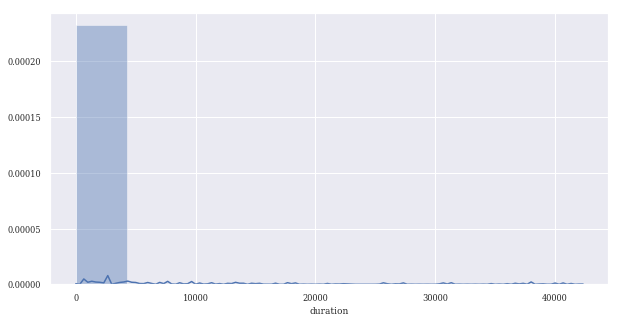

In [24]:
sns.distplot(connSample.duration, bins = 10);

##### Skew distribution -> log transformation

In [25]:
np.log(connSample.duration+1).describe()

count    6316.000000
mean        0.338317
std         1.502724
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        10.653464
Name: duration, dtype: float64

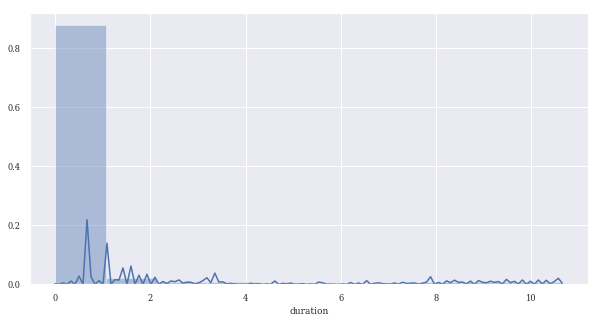

In [26]:
sns.distplot(np.log(connSample.duration+1), bins=10);

##### Let's inspect how many values are equal to 0:

In [27]:
print("Numbers of 0's in duration feature: ", len(connSample.duration[connSample.duration == 0]))
print("The percentage of 0's in duration feature:", 100.0*len(connSample.duration[connSample.duration == 0])/len(connSample.duration))

Numbers of 0's in duration feature:  5785
The percentage of 0's in duration feature: 91.59278024065864


##### Inspecting the distribution without 0's

In [28]:
np.log(connSample.duration[connSample.duration>0]+1).describe()

count    531.000000
mean       4.024121
std        3.470783
min        0.693147
25%        1.098612
50%        2.564949
75%        7.814602
max       10.653464
Name: duration, dtype: float64

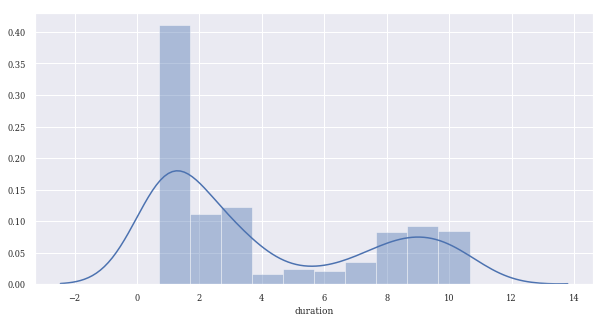

In [29]:
sns.distplot(np.log(connSample.duration[connSample.duration > 0]+1), bins=10);

---

* **name:** protocol_type
* **description:** type of the protocol, e.g. tcp, udp, etc.
* **type:** discrete

In [30]:
#Statistics with all data
conn.describe('protocol_type').toPandas()

,summary,protocol_type
0,count,125973
1,mean,None
2,stddev,None
3,min,icmp
4,max,udp


In [31]:
#Get the percentage of the values
percentageOf(conn, 'protocol_type')

[('tcp', 0.815166742079652),
 ('udp', 0.1190175672564756),
 ('icmp', 0.06581569066387241)]

In [32]:
#Statistics with the sample data
connSample.protocol_type.describe()

count     6316
unique       3
top        tcp
freq      5124
Name: protocol_type, dtype: object

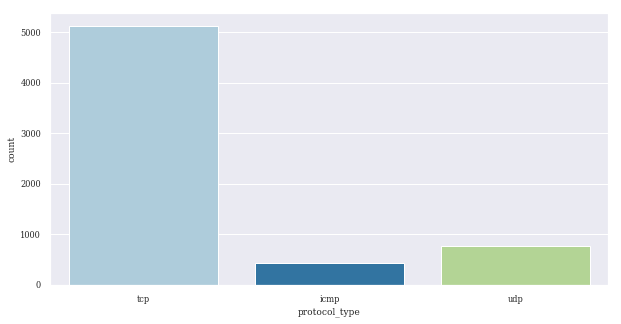

In [33]:
sns.countplot(x='protocol_type', data = connSample, palette='Paired');

In [34]:
print("Percentages of protocol_type: ")
print(1.0*connSample.protocol_type.value_counts()/len(connSample.protocol_type))

Percentages of protocol_type: 
tcp     0.811273
udp     0.121438
icmp    0.067289
Name: protocol_type, dtype: float64


------------------------------

* **name:** service
* **description:** network service on the destination, e.g., http, telnet, etc.
* **type:** discrete

In [35]:
#Statistics with all data
conn.describe('service').toPandas()

,summary,service
0,count,125973
1,mean,None
2,stddev,None
3,min,IRC
4,max,whois


In [36]:
#Get all different values
conn.freqItems(['service']).collect()[0]

Row(service_freqItems=['whois', 'imap4', 'http_2784', 'uucp', 'mtp', 'courier', 'urp_i', 'netbios_ns', 'uucp_path', 'ntp_u', 'domain', 'csnet_ns', 'ldap', 'private', 'aol', 'netbios_dgm', 'nnsp', 'ftp_data', 'Z39_50', 'netstat', 'kshell', 'remote_job', 'iso_tsap', 'sunrpc', 'http_8001', 'domain_u', 'ftp', 'tftp_u', 'tim_i', 'pop_3', 'link', 'bgp', 'netbios_ssn', 'discard', 'hostnames', 'sql_net', 'pop_2', 'name', 'finger', 'vmnet', 'klogin', 'smtp', 'shell', 'http_443', 'rje', 'X11', 'urh_i', 'eco_i', 'IRC', 'nntp', 'daytime', 'ecr_i', 'time', 'exec', 'harvest', 'ctf', 'auth', 'efs', 'gopher', 'echo', 'http', 'printer', 'supdup', 'telnet', 'systat', 'red_i', 'pm_dump', 'other', 'login', 'ssh'])

In [37]:
#Get the percentage of the values
percentageOf(conn, 'service')

[('http', 0.32021147388726157),
 ('private', 0.17347368086812254),
 ('domain_u', 0.07178522381780222),
 ('smtp', 0.05805212228017115),
 ('ftp_data', 0.05445611361164694),
 ('eco_i', 0.0364046263881943),
 ('other', 0.034602652949441544),
 ('ecr_i', 0.024425869035428226),
 ('telnet', 0.018678605732974526),
 ('finger', 0.014026815269938797),
 ('ftp', 0.013923618553182032),
 ('auth', 0.007580989577131608),
 ('Z39_50', 0.006842736141871671),
 ('uucp', 0.006191803005405921),
 ('courier', 0.005826645392266597),
 ('bgp', 0.0056361283767156455),
 ('whois', 0.005501178824033721),
 ('uucp_path', 0.005469425988108563),
 ('iso_tsap', 0.005453549570145984),
 ('time', 0.005191588673763426),
 ('imap4', 0.005136021210894398),
 ('nnsp', 0.005001071658212474),
 ('vmnet', 0.0048978749414557085),
 ('urp_i', 0.004778801806736364),
 ('domain', 0.004516840910353806),
 ('ctf', 0.004469211656466068),
 ('csnet_ns', 0.004326323894802854),
 ('supdup', 0.004318385685821565),
 ('discard', 0.004270756431933827),
 ('h

In [38]:
connSample.service.describe()

count     6316
unique      61
top       http
freq      1933
Name: service, dtype: object

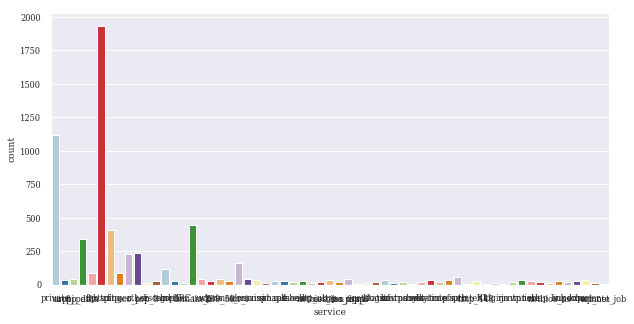

In [39]:
sns.countplot(x='service', data=connSample, palette='Paired');

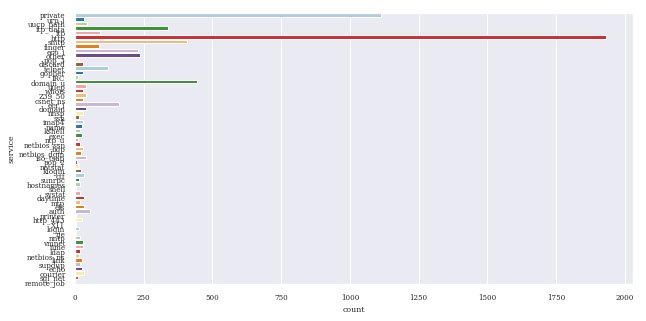

In [40]:
sns.set(font= 'serif', font_scale= 0.65)
sns.countplot(y='service', data=connSample, palette='Paired');

In [41]:
print("Percentages of service's value:")
print(1.0*connSample.service.value_counts()/len(connSample.service))

Percentages of service's value:
http           0.306048
private        0.176536
domain_u       0.070456
smtp           0.064756
ftp_data       0.053357
other          0.037365
eco_i          0.036574
ecr_i          0.025649
telnet         0.018841
ftp            0.014250
finger         0.013775
auth           0.008550
uucp_path      0.006966
domain         0.006491
Z39_50         0.006491
iso_tsap       0.006175
uucp           0.006175
courier        0.005225
ctf            0.005225
daytime        0.005225
efs            0.005066
urp_i          0.005066
vmnet          0.004908
nnsp           0.004908
bgp            0.004908
csnet_ns       0.004750
imap4          0.004750
time           0.004592
whois          0.004592
gopher         0.004592
                 ...   
http_443       0.004275
exec           0.004117
name           0.003800
link           0.003800
echo           0.003800
netbios_dgm    0.003642
klogin         0.003642
systat         0.003167
supdup         0.003008
mtp     

---

* **name:** flag
* **description:** normal or error status of the connection. The possible status are this: SF, S0, S1, S2, S3, OTH, REJ, RSTO, RSTOS0, SH, RSTRH, SHR
* **type:** discrete

In [42]:
#Statistics with all data
conn.describe('flag').toPandas()

,summary,flag
0,count,125973
1,mean,None
2,stddev,None
3,min,OTH
4,max,SH


In [43]:
#Get all different values
conn.freqItems(['flag']).collect()[0]

Row(flag_freqItems=['RSTOS0', 'SF', 'REJ', 'S1', 'OTH', 'S0', 'S3', 'SH', 'S2', 'RSTO', 'RSTR'])

In [44]:
#Get the percentage of the values
percentageOf(conn, 'flag')

[('SF', 0.5949290721027521),
 ('S0', 0.2766545212069253),
 ('REJ', 0.08916990148682655),
 ('RSTR', 0.019218403943702222),
 ('RSTO', 0.01239948242877442),
 ('S1', 0.0028974462781707192),
 ('SH', 0.0021512546339294927),
 ('S2', 0.0010081525406237845),
 ('RSTOS0', 0.000817635525072833),
 ('S3', 0.00038897224008319244),
 ('OTH', 0.0003651576131393235)]

In [45]:
#Get stats with the Sample
connSample.flag.describe()

count     6316
unique      11
top         SF
freq      3736
Name: flag, dtype: object

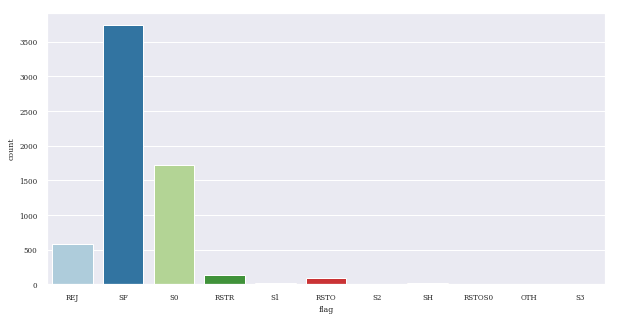

In [46]:
sns.countplot(x='flag', data=connSample, palette='Paired');

In [47]:
connSample.flag.value_counts()

SF        3736
S0        1720
REJ        576
RSTR       131
RSTO        98
S1          25
SH          16
S2           7
RSTOS0       5
OTH          1
S3           1
Name: flag, dtype: int64

In [48]:
print("Percentages of flag's value:")
print(1.0*connSample.flag.value_counts()/len(connSample.flag))

Percentages of flag's value:
SF        0.591514
S0        0.272324
REJ       0.091197
RSTR      0.020741
RSTO      0.015516
S1        0.003958
SH        0.002533
S2        0.001108
RSTOS0    0.000792
OTH       0.000158
S3        0.000158
Name: flag, dtype: float64


---

* **name:** src_bytes
* **description:** number of data bytes from source to destination
* **type:** continuous

In [49]:
#Statistics with all data
conn.describe('src_bytes').toPandas()

,summary,src_bytes
0,count,125973
1,mean,45566.74271470871
2,stddev,5870331.156168299
3,min,0.0
4,max,1.3799639E9


In [50]:
#Stats with the sample
connSample.src_bytes.describe()

count    6.316000e+03
mean     3.043659e+05
std      1.708791e+07
min      0.000000e+00
25%      0.000000e+00
50%      4.400000e+01
75%      2.770000e+02
max      1.167519e+09
Name: src_bytes, dtype: float64

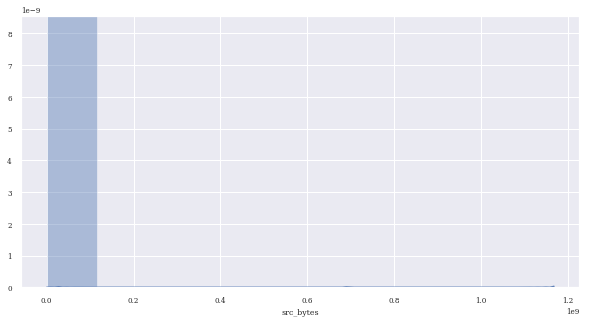

In [51]:
sns.distplot(connSample.src_bytes, bins=10);

##### Skew distribution -> log transformation

In [52]:
np.log(connSample.src_bytes+1).describe()

count    6316.000000
mean        3.219260
std         2.990668
min         0.000000
25%         0.000000
50%         3.806663
75%         5.627621
max        20.878147
Name: src_bytes, dtype: float64

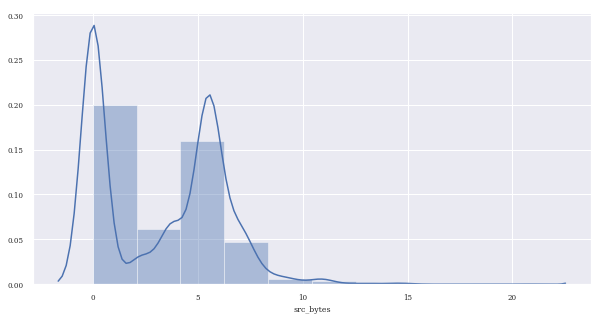

In [53]:
sns.distplot(np.log(connSample.src_bytes+1), bins = 10);

---

* **name:** dst_bytes
* **description:** number of data bytes from destination to source
* **type:** continuous

In [54]:
#Statistics with all data
conn.describe('dst_bytes').toPandas()

,summary,dst_bytes
0,count,125973
1,mean,19779.114667428734
2,stddev,4021269.1885064766
3,min,0.0
4,max,1.30993741E9


In [55]:
#Log transformation with all data
conn.select(log(conn['dst_bytes']+1)).describe().toPandas()

,summary,LOG((dst_bytes + 1))
0,count,125973
1,mean,3.084399587176607
2,stddev,3.5489269852523235
3,min,0.0
4,max,20.99324519286529


In [56]:
#Statistics with sample data
np.log(connSample.dst_bytes+1).describe()

count    6316.000000
mean        3.028687
std         3.512178
min         0.000000
25%         0.000000
50%         0.000000
75%         6.120846
max        19.807703
Name: dst_bytes, dtype: float64

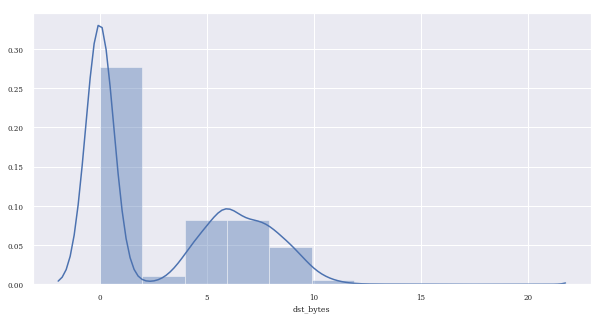

In [57]:
sns.distplot(np.log(connSample.dst_bytes+1), bins = 10);

---

* **name:** land
* **description:** 1 if connection is from/to the same host/port; 0 otherwise
* **type:** discrete

In [58]:
#Statistics with all data
conn.describe('land').toPandas()

,summary,land
0,count,125973
1,mean,1.9845522453224102E-4
2,stddev,0.014086071671513122
3,min,0
4,max,1


In [59]:
numberOf(conn, 'land')

[('0', 125948), ('1', 25)]

In [60]:
connSample.land.describe()

count     6316
unique       2
top          0
freq      6314
Name: land, dtype: object

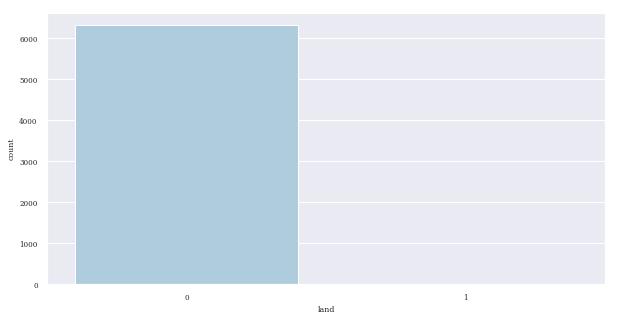

In [61]:
sns.countplot(x='land', data=connSample, palette='Paired');

In [62]:
connSample.land.value_counts()

0    6314
1       2
Name: land, dtype: int64

In [63]:
print("Percentages of lands's value:")
print(1.0*connSample.land.value_counts()/len(connSample.land))

Percentages of lands's value:
0    0.999683
1    0.000317
Name: land, dtype: float64


---

* **name:** wrong_fragment	
* **description:** sum of bad checksum packets in a connection
* **type:** continuous

In [64]:
#Statistics with all data
conn.describe('wrong_fragment').toPandas()

,summary,wrong_fragment
0,count,125973
1,mean,0.022687401268525795
2,stddev,0.2535299859520133
3,min,0.0
4,max,3.0


In [65]:
#Get the percentage of the values
numberOf(conn, 'wrong_fragment')

[(0.0, 124883), (3.0, 884), (1.0, 206)]

In [66]:
#Stat from sample data
connSample.wrong_fragment.describe()

count    6316.000000
mean        0.026916
std         0.274958
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: wrong_fragment, dtype: float64

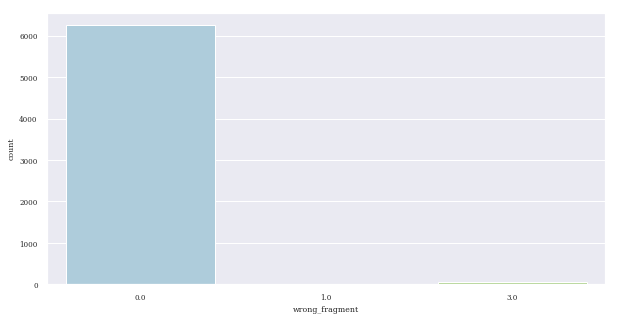

In [67]:
sns.countplot(x= 'wrong_fragment', data= connSample, palette='Paired');

In [68]:
connSample.wrong_fragment.value_counts()

0.0    6250
3.0      52
1.0      14
Name: wrong_fragment, dtype: int64

In [69]:
print("Percentages of wrong_fragment's value:")
print(1.0*connSample.wrong_fragment.value_counts()/len(connSample.wrong_fragment))

Percentages of wrong_fragment's value:
0.0    0.989550
3.0    0.008233
1.0    0.002217
Name: wrong_fragment, dtype: float64


---

* **name:** urgent	
* **description:** number of urgent packets. Urgent packets are packets with the urgent bit activated
* **type:** continuous

In [70]:
#Statistics with all data
conn.describe('urgent').toPandas()

,summary,urgent
0,count,125973
1,mean,1.1113492573805498E-4
2,stddev,0.014366026620154248
3,min,0.0
4,max,3.0


In [71]:
#Get the percentage of the values
numberOf(conn, 'urgent')

[(0.0, 125964), (1.0, 5), (2.0, 3), (3.0, 1)]

In [72]:
connSample.urgent.describe()

count    6316.000000
mean        0.000317
std         0.025166
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: urgent, dtype: float64

In [73]:
connSample.urgent.value_counts()

0.0    6315
2.0       1
Name: urgent, dtype: int64

In [74]:
print("Percentages of urgent's value:")
print(1.0*connSample.urgent.value_counts()/len(connSample.urgent))

Percentages of urgent's value:
0.0    0.999842
2.0    0.000158
Name: urgent, dtype: float64


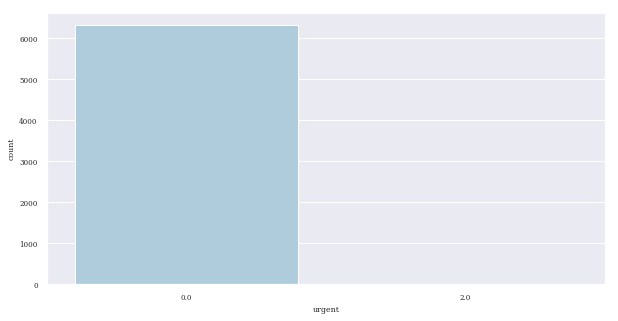

In [75]:
sns.countplot(x = 'urgent', data = connSample, palette="Paired");

#### Conclusions: Univariate Analysis

The most relevant conclusions of univariante Analysis are:
* **duration:** is highly right-skewed. In fact the 92% of the values are 0's. The log transformation without 0's seems to have a bimodal distribution
* **connection_type:** has most of the instances with the values *tcp* (81%)
* **service:** only two values (*http* and *private*) of 70 concentrate the 50% of the instances
* **flag:** only three values (*SF*, *S0* and *REJ*) of 11 concentrate the 95% of the instances
* **src_bytes:** is right-skewed. The log transformation seems to have a bimodal distribution
* **dst_bytes:** is right-skewed. The log transformation seems to have a bimodal distribution
* **land:** actually is a discrete feature with two values: 0 and 1. The 99,98% of the instances have the value 0
* **wrong_fragment:** is a continuous variable with only three values: 0, 1 and 3. The 99.13% of the instances have the value 0
* **urgent:** is a continuous variable with only four values: 0, 1, 2 and 3. The 99.99% of the instances have the value 0


----------

### Bivariate Analysis

### duration vs protocol_type

* **name:** duration
* **description:** length (number of seconds) of the connection
* **type:** continuous


* **name:** protocol_type
* **description:** type of the protocol, e.g. tcp, udp, etc.
* **type:** discrete

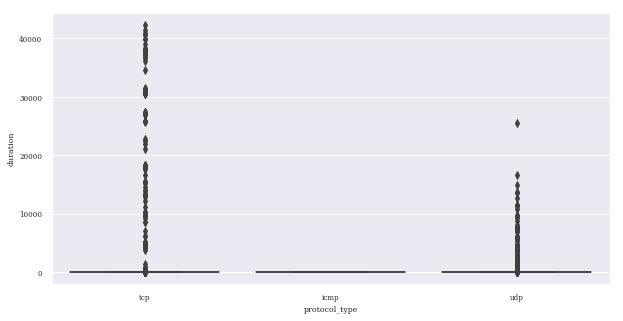

In [76]:
sns.boxplot(x = 'protocol_type', y='duration', data = connSample, palette= 'Paired');

In [77]:
connSample['duration_log'] = np.log(connSample.duration+1)

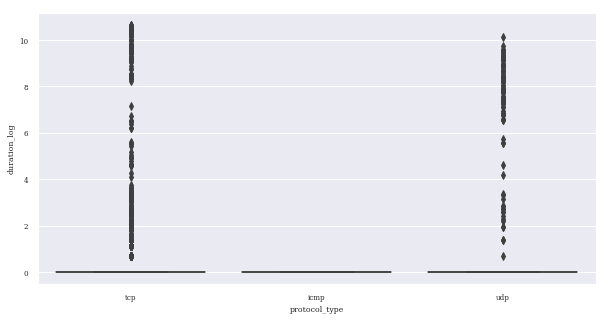

In [78]:
sns.boxplot(x = 'protocol_type', y = 'duration_log', data = connSample, palette= 'Paired');

##### Inspecting the distribution with duration_log more than 0

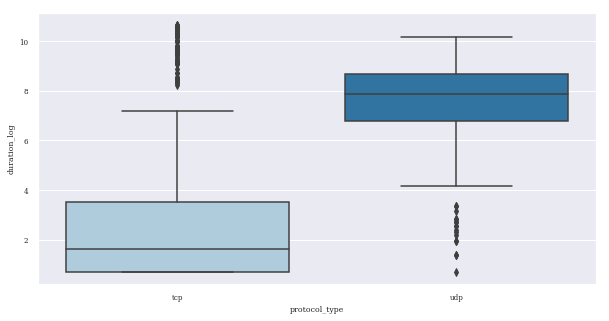

In [79]:
sns.boxplot(x= 'protocol_type', y= 'duration_log'
            , data = connSample[connSample.duration_log > 0]
            , palette = 'Paired');

##### Inspecting the distribution with duration_log == 0

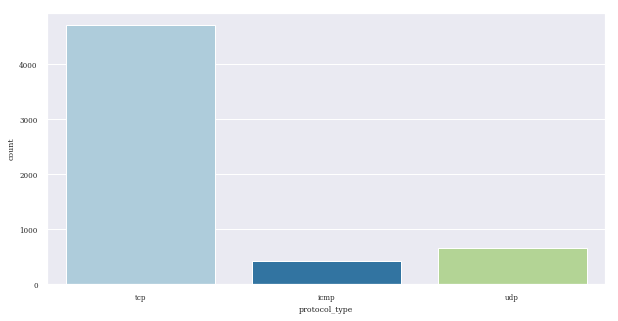

In [80]:
sns.countplot( x='protocol_type' 
              , data = connSample[connSample.duration_log == 0]
              , palette = 'Paired');

#### Conclusions duration vs protocol_type analysis
* Regardless the *protocol_type* feature most of the values of *duration* features are 0's
* When the value of *protocol_type* is *'icmp'* all the values of *duration* features is 0
* After the log(x+1) transformation of *protocol_type* and removing the 0's values, the distributions of *duration* is very different between *'tcp'* and *'udp'* 




----------------------------------------------

### Exercise 1
Make the *duration* vs *service* analysis

----------

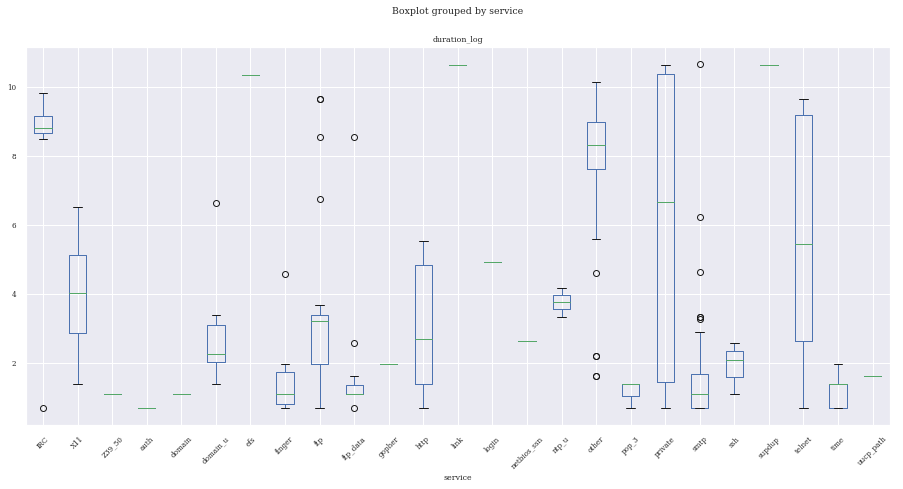

In [81]:
connSample[connSample.duration_log>0].boxplot('duration_log', 
                                              by='service', 
                                              rot = 45, 
                                              figsize = (15, 7));

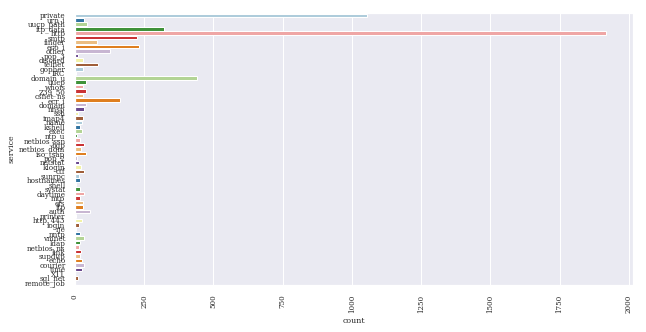

In [82]:
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
sns.countplot(y='service', data = connSample[connSample.duration_log == 0], palette= 'Paired');

### duration vs flag

* **name:** duration
* **description:** length (number of seconds) of the connection
* **type:** continuous


* **name:** flag
* **description:** normal or error status of the connection. The possible status are this: SF, S0, S1, S2, S3, OTH, REJ, RSTO, RSTOS0, SH, RSTRH, SHR
* **type:** discrete

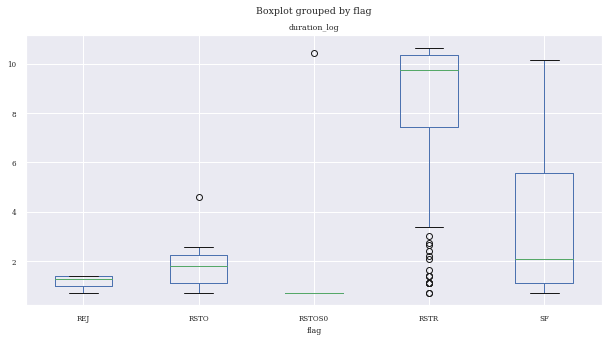

In [83]:
connSample[connSample.duration > 0].boxplot('duration_log', by='flag');

##### Inspecting the distribution with duration_log == 0

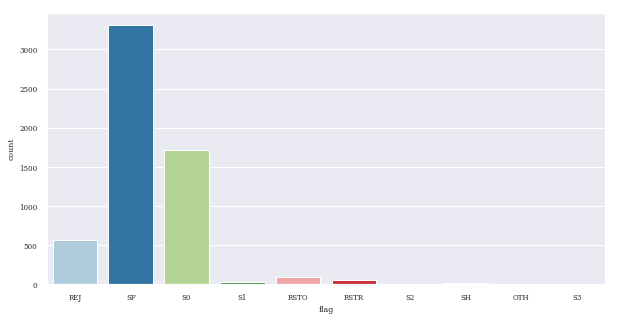

In [84]:
sns.countplot(x = 'flag', data = connSample[connSample.duration_log == 0], palette= 'Paired');

In [85]:
print("Percentages of flag's value:")
print(1.0*connSample[connSample.duration_log == 0].flag.value_counts()/len(connSample[connSample.duration_log == 0].flag))

Percentages of flag's value:
SF      0.571478
S0      0.297321
REJ     0.098876
RSTO    0.015212
RSTR    0.008470
S1      0.004322
SH      0.002766
S2      0.001210
OTH     0.000173
S3      0.000173
Name: flag, dtype: float64


#### Conclusions duration vs flag analysis
* Regardless the *flag* feature most of the values of *duration* features are 0's
* After the log(x+1) transformation of *flag* and removing the 0's values, the distributions of *duration* is very different in *'RSTR'* and *'RSTOS0'* categories 
* If duration_log is 0, only three values (*SF*, *S0* and *REJ*) of 11 concentrate the 96% of the instances


----------------------------------------------

### duration vs src_bytes

* **name:** duration
* **description:** length (number of seconds) of the connection
* **type:** continuous


* **name:** src_bytes
* **description:** number of data bytes from source to destination
* **type:** continuous

In [86]:
connSample['src_bytes_log'] = np.log(connSample.src_bytes+1)

**Inspecting with duration > 0 **

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


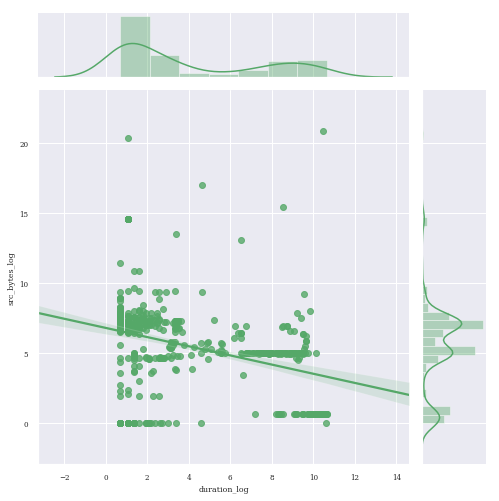

In [87]:
color = sns.color_palette()[2]
sns.jointplot("duration_log", "src_bytes_log", data=connSample[connSample.duration>0], 
              kind="reg", color = color, size=7);

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


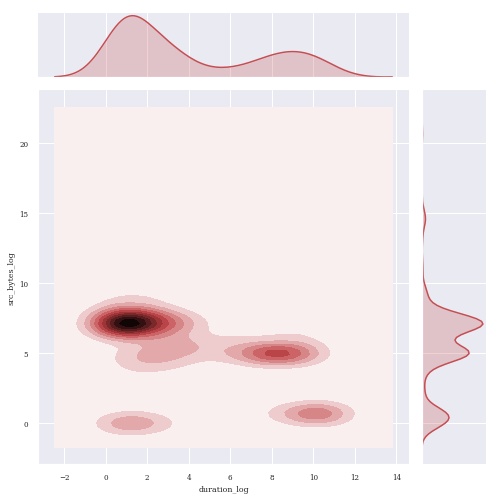

In [88]:
#with kde (Kernel density estimation)
color = sns.color_palette()[3]
sns.jointplot("duration_log", "src_bytes_log", 
              data=connSample[connSample.duration>0], 
              kind="kde", color = color, size=7);

**Inspecting with duration == 0 **

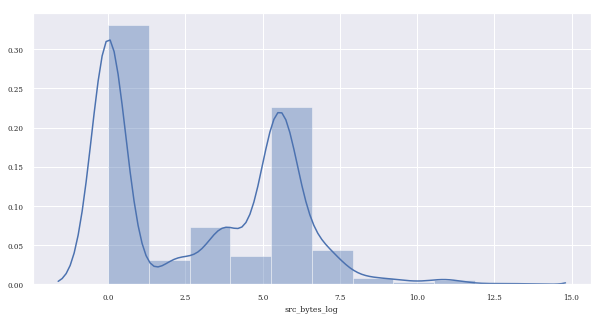

In [89]:
sns.distplot(connSample[connSample.duration_log == 0].src_bytes_log, bins = 10);

**Inspecting with src_bytes_log == 0 **

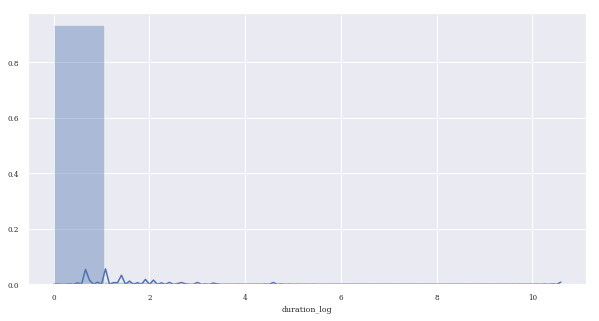

In [90]:
sns.distplot(connSample[connSample.src_bytes_log == 0].duration_log, bins = 10);

#### Conclusions duration vs src_bytes analysis
The analysis was splited in three cases:
* Case 1: *duration_log* and *src_bytes_logs* are greater than 0:
    - There are not strong correlation between *duration_log* and *src_bytes_log*
    - On the other hand, it seems there are some clusters between both variables
* Case 2: *duration_log* is equal to 0:
    - It seems *src_bytes* has a multimodal distribution
* Case 3: *src_bytes_log* is equal to 0:
    - Most of the values of *duration_log* is equal to 0




----------------------------------------------

### duration vs dst_bytes

* **name:** duration
* **description:** length (number of seconds) of the connection
* **type:** continuous


* **name:** dst_bytes
* **description:** number of data bytes from destination to source
* **type:** continuous

In [91]:
connSample['dst_bytes_log'] = np.log(connSample.dst_bytes+1)

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


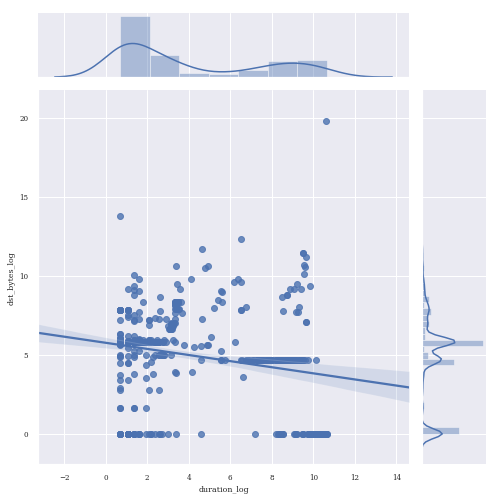

In [92]:
sns.jointplot("duration_log", "dst_bytes_log", 
              data= connSample[connSample.duration>0], 
              kind="reg", size=7);

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


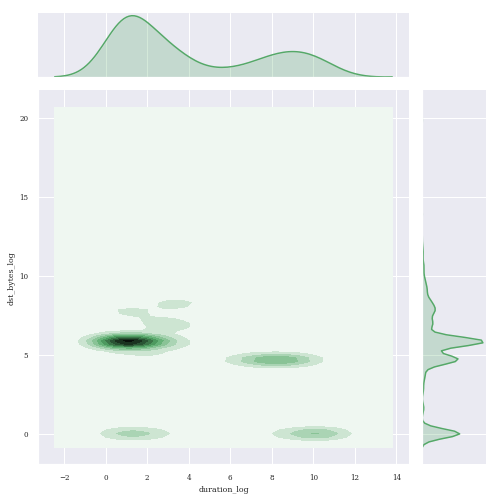

In [93]:
#with kde (Kernel density estimation)
color = sns.color_palette()[2]
sns.jointplot("duration_log", "dst_bytes_log", 
              data= connSample[connSample.duration>0], 
              color = color, kind="kde", size=7);

**Inspecting with duration == 0 **

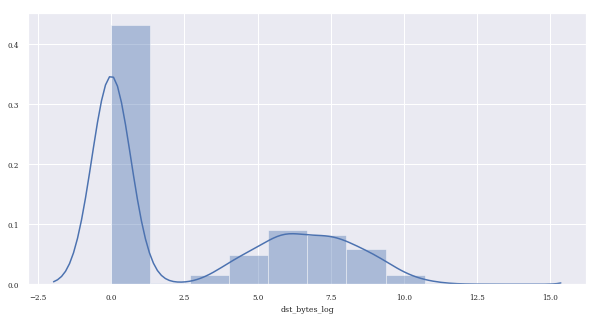

In [94]:
sns.distplot(connSample[connSample.duration_log == 0].dst_bytes_log, bins = 10);

**Inspecting with dst_bytes_log == 0 **

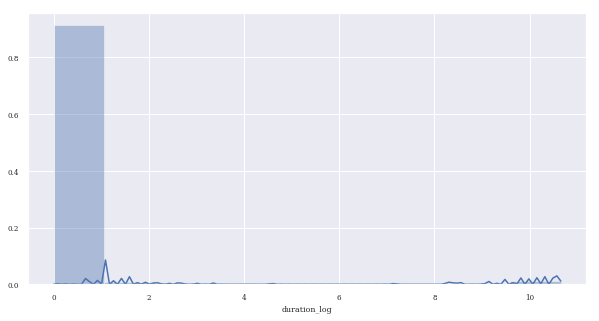

In [95]:
sns.distplot(connSample[connSample.dst_bytes_log == 0].duration_log, bins = 10);

#### Conclusions duration vs dst_bytes analysis
The analysis was splited in three cases:
* Case 1: *duration_log* and *dst_bytes_logs* are greater than 0:
    - There are not strong correlation between *duration_log* and *dst_bytes_log*
    - On the other hand, it seems there are some clusters between both variables
* Case 2: *duration_log* is equal to 0:
    - It seems *dst_bytes* has a bimodal distribution
* Case 3: *dst_bytes_log* is equal to 0:
    - Most of the values of *duration_log* is equal to 0




----------------------------------------------

### duration vs land

* **name:** duration
* **description:** length (number of seconds) of the connection
* **type:** continuous


* **name:** land
* **description:** 1 if connection is from/to the same host/port; 0 otherwise
* **type:** discrete

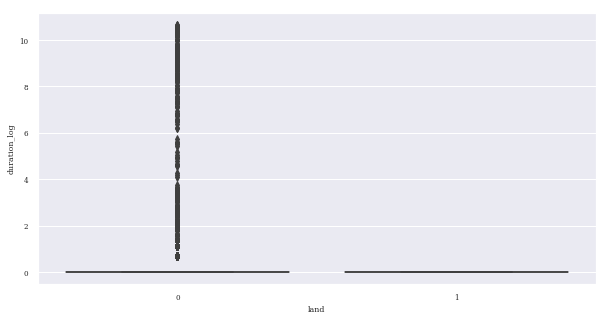

In [96]:
sns.boxplot(x = "land", y = "duration_log", data= connSample, palette= 'Paired');

In [97]:
connSample.pivot_table("duration_log","land", aggfunc=np.average)

,duration_log
land,
0,0.338424
1,0.000000


**Inspecting with duration > 0 **

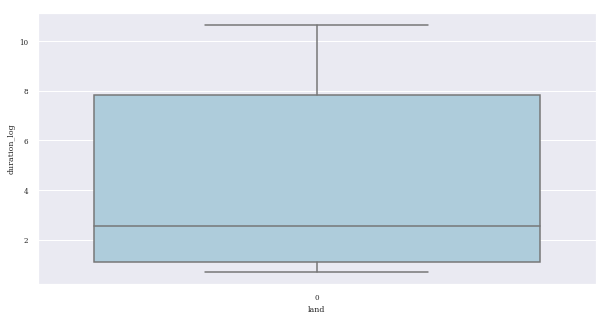

In [98]:
sns.boxplot(x = "land", y = "duration_log", 
            data= connSample[connSample.duration > 0], 
            palette= 'Paired');

####Conclusions duration vs land analysis
* If *duration_log* is greater than 0 then we have only values with *land* == 0 and its distribution is right-skewed




----------------------------------------------

### duration vs wrong_fragment

* **name:** duration
* **description:** length (number of seconds) of the connection
* **type:** continuous


* **name:** wrong_fragment	
* **description:** sum of bad checksum packets in a connection
* **type:** continuous

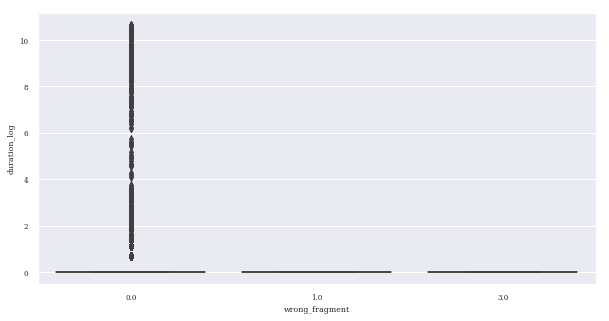

In [99]:
sns.boxplot(x= 'wrong_fragment', y= 'duration_log', 
           data = connSample, 
           palette = 'Paired');

In [100]:
connSample.pivot_table("duration_log","wrong_fragment", aggfunc=np.average)

,duration_log
wrong_fragment,
0.0,0.341889
1.0,0.000000
3.0,0.000000


**Inspecting with duration > 0 **

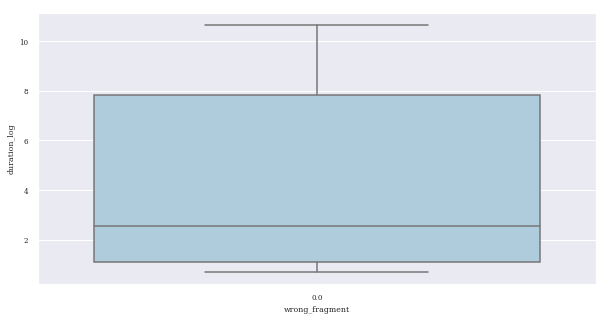

In [101]:
sns.boxplot(x= 'wrong_fragment', y= 'duration_log', 
           data = connSample[connSample.duration_log > 0], 
           palette = 'Paired');

#### Conclusions duration vs wrong_fragment

* If *duration_log* is greater than 0 then we have only values with *wrong_fragment* == 0 and its distribution is right-skewed




----------------------------------------------

### Exercicie 2: duration vs urgent

* **name:** duration
* **description:** length (number of seconds) of the connection
* **type:** continuous


* **name:** urgent	
* **description:** number of urgent packets. Urgent packets are packets with the urgent bit activated
* **type:** continuous

#### Conclusions duration vs urgent




----------------------------------------------

### protocol_type vs service

* **name:** protocol_type
* **description:** type of the protocol, e.g. tcp, udp, etc.
* **type:** discrete

* **name:** service
* **description:** network service on the destination, e.g., http, telnet, etc.
* **type:** discrete

In [102]:
connSample.pivot_table("attack", "service","protocol_type", aggfunc=len)

protocol_type,icmp,tcp,udp
service,,,
IRC,NaN,10.0,NaN
X11,NaN,5.0,NaN
Z39_50,NaN,41.0,NaN
auth,NaN,54.0,NaN
bgp,NaN,31.0,NaN
courier,NaN,33.0,NaN
csnet_ns,NaN,30.0,NaN
ctf,NaN,33.0,NaN
daytime,NaN,33.0,NaN


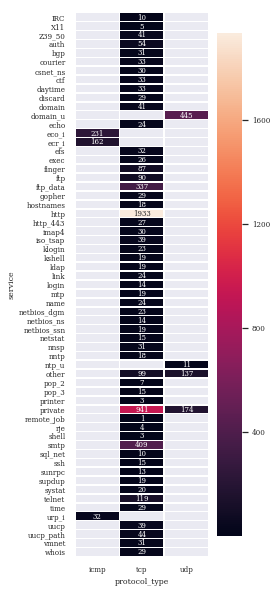

In [103]:
sns.set(font= 'serif', font_scale=0.65, rc={"figure.figsize": (3, 10)})
sns.heatmap(connSample.pivot_table("attack", "service","protocol_type", aggfunc=len), 
            square= False,
            annot=True, annot_kws={"size": 7}, fmt=".0f", linewidths= .5);

#### Conclusions protocol_type vs service analysis
* Except two general services (*'other'* and *'private'*) all the *services* categories belong to a *protocol_type* category




----------------------------------------------

### protocol_type vs flag

* **name:** protocol_type
* **description:** type of the protocol, e.g. tcp, udp, etc.
* **type:** discrete

* **name:** flag
* **description:** normal or error status of the connection. The possible status are this: SF, S0, S1, S2, S3, OTH, REJ, RSTO, RSTOS0, SH, RSTRH, SHR
* **type:** discrete

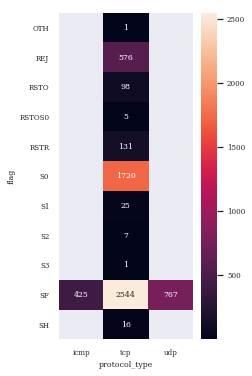

In [104]:
sns.set(font= 'serif', font_scale=0.65, rc={"figure.figsize": (3, 6)})
sns.heatmap(connSample.pivot_table("attack", "flag","protocol_type", aggfunc=len), 
            annot=True, fmt=".0f");

#### Conclusions protocol_type vs flag analysis
* All *flag* categories beleng only to *'tcp'* *protocol_type* except *'SF'* flag that belongs to the three *protocol_type*s



----------------------------------------------

### Exercise 3: protocol_type vs src_bytes
Make the *protocol_type* vs *src_bytes* analysis

----------

### Exercise 4: protocol_type vs dst_bytes
Make the *protocol_type* vs *dst_bytes* analysis

----------

### Multivariate Analysis

### src_bytes & dst_bytes & wrong_fragmnet & urgent vs class

* **name:** urgent	
* **description:** number of urgent packets. Urgent packets are packets with the urgent bit activated
* **type:** continuous

* **name:** src_bytes
* **description:** number of data bytes from source to destination
* **type:** continuous

* **name:** dst_bytes
* **description:** number of data bytes from destination to source
* **type:** continuous

* **name:** wrong_fragment	
* **description:** sum of bad checksum packets in a connection
* **type:** continuous

* **name:** attack	
* **description:** is the label attribute and indicates which type of connections is each instance: normal or which attack. The values it can take are the following: *anomaly, dict, dict_simple, eject, eject-fail, ffb, ffb_clear, format, format_clear, format-fail, ftp-write, guest, imap, land, load_clear, loadmodule, multihop, perl_clear, perlmagic, phf, rootkit, spy, syslog, teardrop, warez, warezclient, warezmaster, pod, back, ip- sweep, neptune, nmap, portsweep, satan, smurf and normal*
* **type:** discrete

In [105]:
#creation of "is_attack" attribute to differentiate the normal connections vs attack connections
connSample["is_attack"] = connSample["attack"].map(lambda x: int(x != "normal"))

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


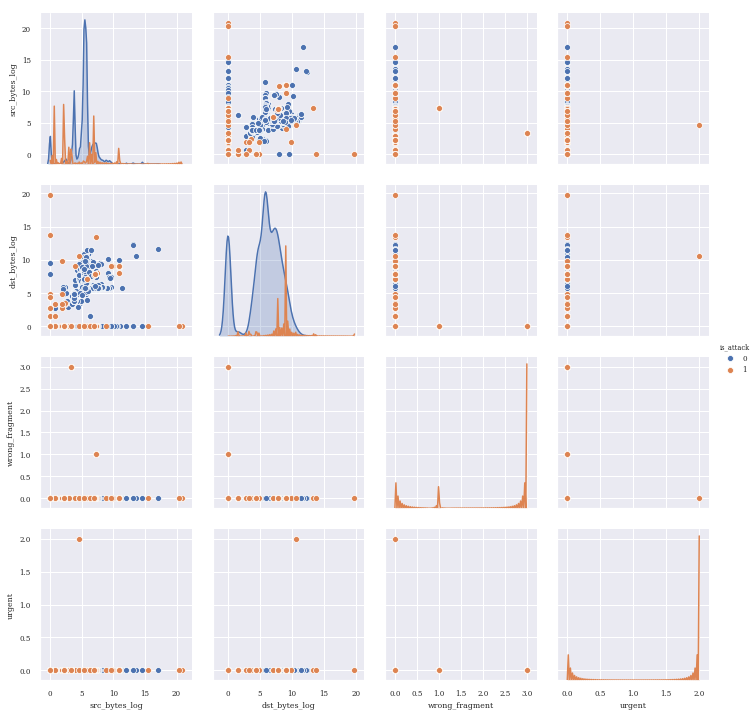

In [106]:
sns.pairplot(connSample, 
             vars=['src_bytes_log','dst_bytes_log','wrong_fragment','urgent'], 
             hue='is_attack');